In [ ]:
 #Load the data
import pandas as pd
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv', index_col=0)
df.head()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


# Exploratory Analysis

In [ ]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


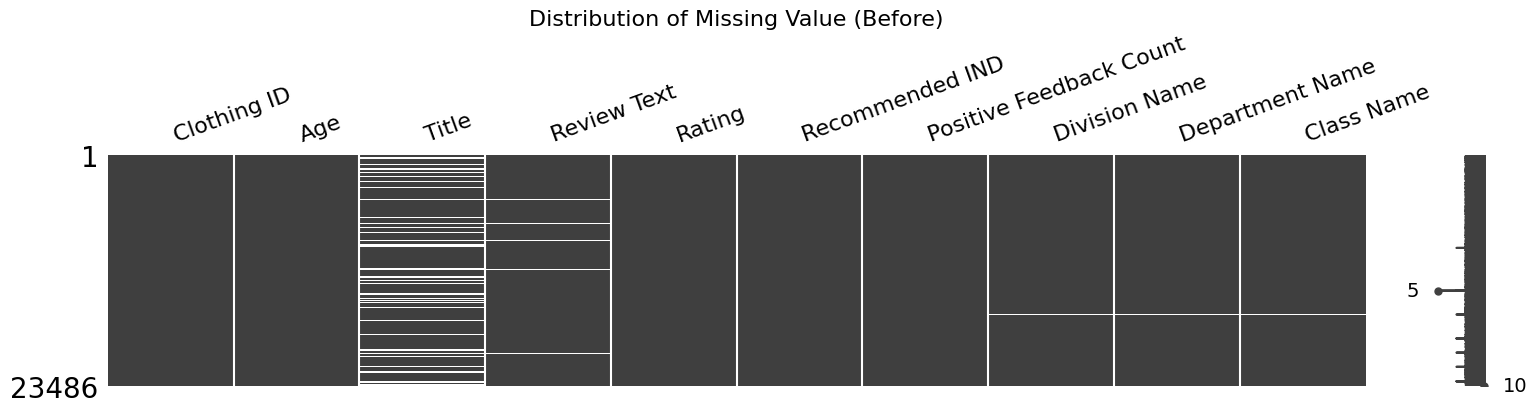

In [ ]:
import missingno as msno
# The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
msno.matrix(df, figsize=(18, 3), label_rotation=20,
           ).set_title('Distribution of Missing Value (Before)',fontsize=16);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
#title and review_text can be concatenated since they are part of the same review:
concat_reviews = []

for title, review in zip(df["Title"], df["Review Text"]):
    if not pd.isnull(title) and pd.isnull(review):
        concat_review = title
    elif pd.isnull(title) and not pd.isnull(review):
        concat_review = review
    elif not pd.isnull(title) and not pd.isnull(review):
        concat_review = title + " " + review
    concat_reviews.append(concat_review)

df = df.drop(columns=["Title", "Review Text"])
df["concat_reviews"] = concat_reviews

#drop column Clothing ID
df.drop(['Clothing ID'], axis=1, inplace=True)

# Remove missing values
#df = df.dropna(subset=['Review Text', 'Recommended IND'])
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,concat_reviews
0,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [ ]:
df.isna().sum()

Age                         0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              14
Department Name            14
Class Name                 14
concat_reviews              0
dtype: int64

Shape of DataFrame:  (23486, 8) 



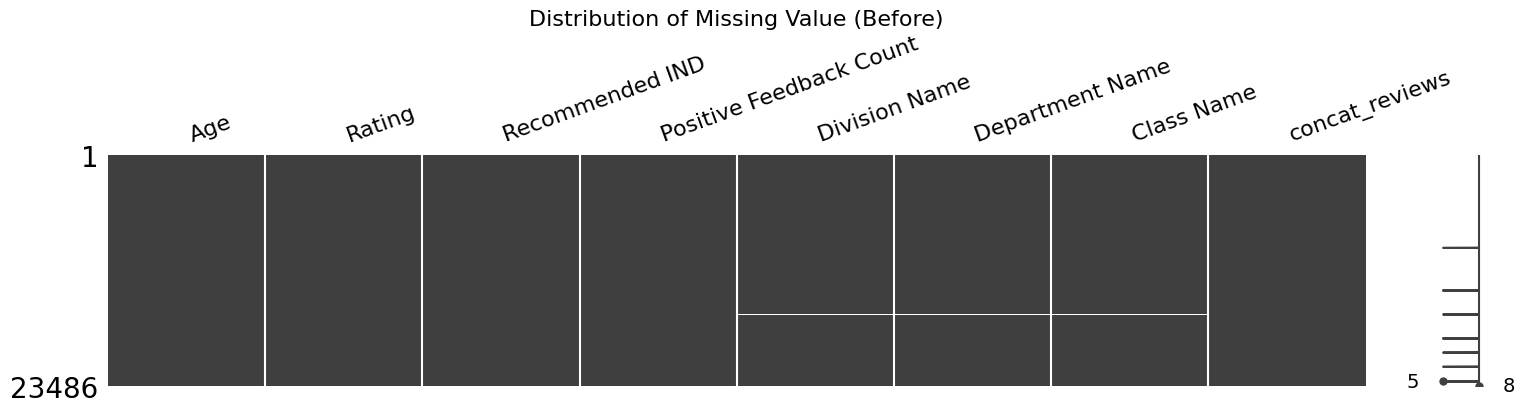

In [ ]:
print('Shape of DataFrame: ',df.shape,'\n')
# The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
import missingno as msno
msno.matrix(df, figsize=(18, 3), label_rotation=20,
           ).set_title('Distribution of Missing Value (Before)',fontsize=16);

In [ ]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

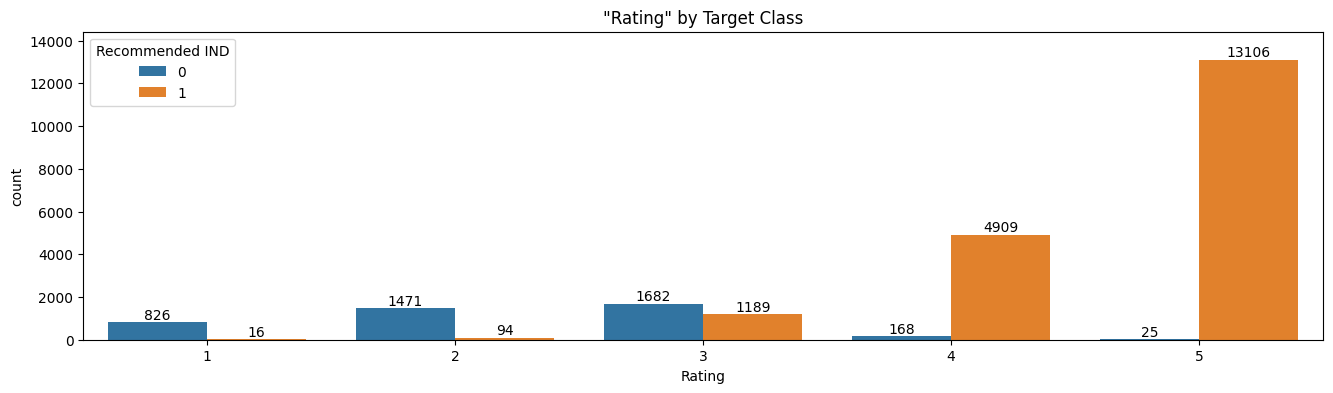

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND",
                   order = df['Rating'].value_counts().sort_values().index)
plt.title('"Rating" by Target Class');
plt.margins(y=.1)
for c in ax.containers:
    ax.bar_label(c)

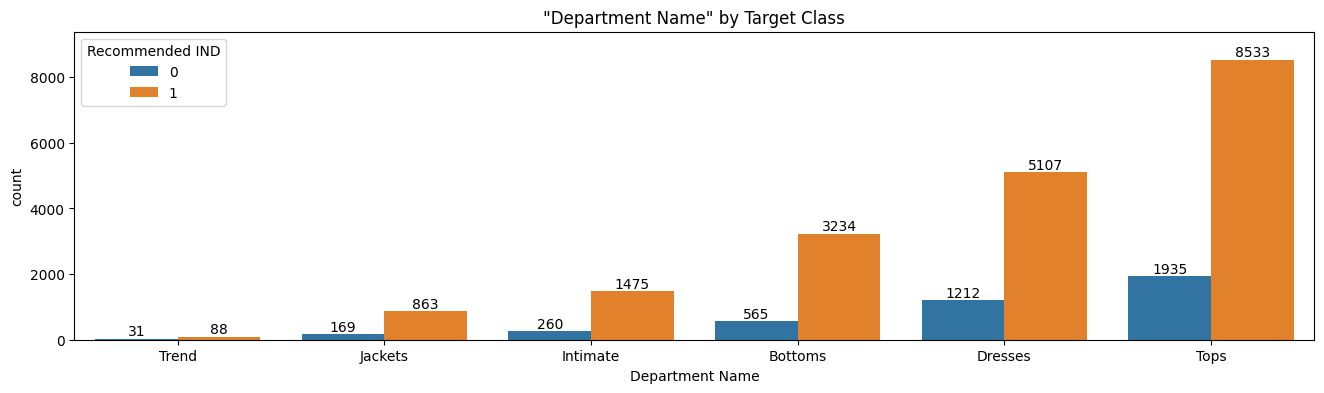

In [ ]:
plt.figure(figsize=(16, 4))
ax = sns.countplot(data =df, x = "Department Name", hue = "Recommended IND",
                   order = df['Department Name'].value_counts().sort_values().index)
plt.title('"Department Name" by Target Class');
plt.margins(y=.1)
for p in ax.containers:
    ax.bar_label(p)

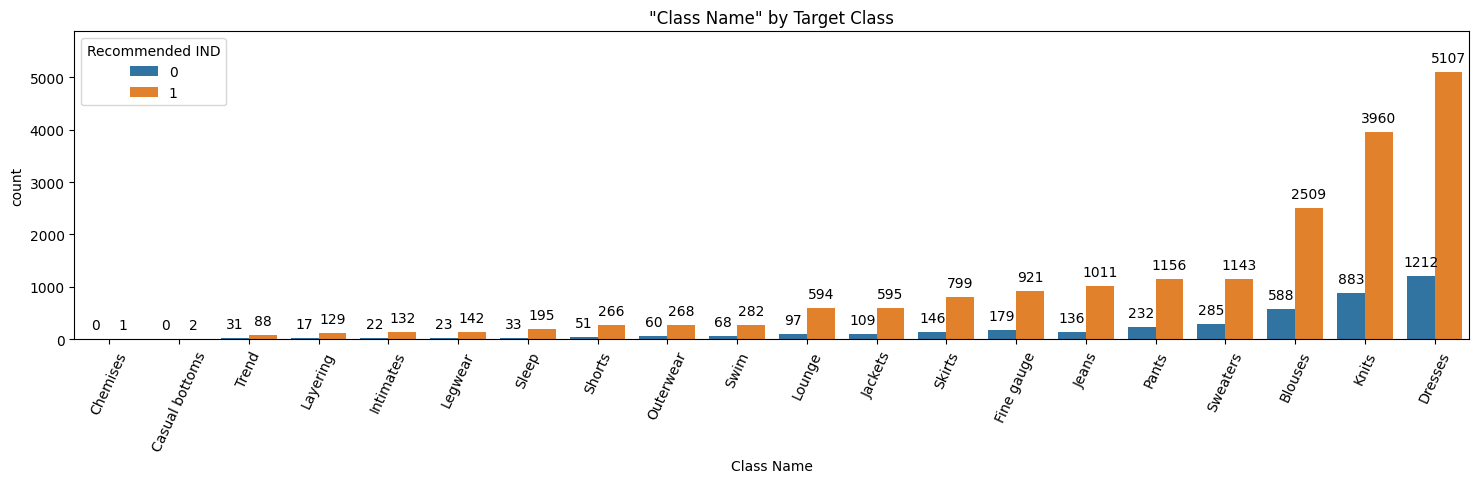

In [ ]:
plt.figure(figsize=(18, 4))
ax = sns.countplot(data =df, x = "Class Name", hue = "Recommended IND",
                   order = df['Class Name'].value_counts().sort_values().index)
plt.title('"Class Name" by Target Class');
plt.xticks(rotation = 65);
plt.margins(y=.15)
for p in ax.containers:
    ax.bar_label(p, rotation=0, padding=5)

Feature Selection

In [ ]:
df = pd.DataFrame(df[["concat_reviews", "Recommended IND"]].values, columns=['text', 'recommended'])
#df.head()
df

,text,recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,Some major design flaws I had such high hopes ...,0
3,"My favorite buy! I love, love, love this jumps...",1
4,Flattering shirt This shirt is very flattering...,1
...,...,...
23481,Great dress for many occasions I was very happ...,1
23482,Wish it was made of cotton It reminds me of ma...,1
23483,"Cute, but see through This fit well, but the t...",0
23484,"Very cute dress, perfect for summer parties an...",1


In [ ]:
df['not_recommended'] = df['recommended'].map({0 : 1, 1: 0})
df

,text,recommended,not_recommended
0,Absolutely wonderful - silky and sexy and comf...,1,0
1,Love this dress! it's sooo pretty. i happene...,1,0
2,Some major design flaws I had such high hopes ...,0,1
3,"My favorite buy! I love, love, love this jumps...",1,0
4,Flattering shirt This shirt is very flattering...,1,0
...,...,...,...
23481,Great dress for many occasions I was very happ...,1,0
23482,Wish it was made of cotton It reminds me of ma...,1,0
23483,"Cute, but see through This fit well, but the t...",0,1
23484,"Very cute dress, perfect for summer parties an...",1,0


# Text Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
# from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('all')
# nltk.download('punkt')
# nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet', download_dir='/usr/share/nltk_data')
nltk.download('averaged_perceptron_tagger')

# if 'wordnet' error
#!unzip -oq /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:

def preprocess_cleaning(text, pos_tags=None, lower=False):
    import re, string

    # define stopwords - subtract 'no', 'not', 'nor' and add set(something)
    stop_words = set(stopwords.words('english')) - {'no', 'not', 'nor'} | set()

    # 0. convert lower Char - recommended and unrecommended include same word do we prefer not lower
    text = text.lower() if lower else text

    # 1. Remove Puncs and upper brackets to keep negative auxiliary verbs in text
    text_without_punc = text.translate(str.maketrans('', '', string.punctuation))

    # 2. Tokenize
    # text_tokens = nltk.tokenize.word_tokenize(text_without_punc.lower())  # can be some special Char
    text_tokens = nltk.RegexpTokenizer(r'\w+|\$[\d\.]+|\S+').tokenize(text_without_punc)

    # 3. Removing Stopwords
    tokens_without_sw  = [word for word in text_tokens if word not in stop_words]

    # 4. lemmatize
    tokens_lemmatized = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in tokens_without_sw]

    if pos_tags is not None:
        # 5. part-of-speech tagging, POS-tagging
        tokens_pos_tagged = nltk.pos_tag(tokens_lemmatized)
        # subtract 'top' for Visualization
        tokens_lemmatized = [word for word, pos_tag in tokens_pos_tagged if pos_tag in pos_tags and word not in ['top']] # ['JJ','JJR','JJS']

    # joining
    return " ".join(tokens_lemmatized)

In [ ]:

df['text_clean']    = df['text'].apply(preprocess_cleaning)
df['text_only_adj'] = df['text'].apply(preprocess_cleaning, pos_tags=['JJ','JJR','JJS'])
df

,text,recommended,not_recommended,text_clean,text_only_adj
0,Absolutely wonderful - silky and sexy and comf...,1,0,Absolutely wonderful silky sexy comfortable,wonderful silky comfortable
1,Love this dress! it's sooo pretty. i happene...,1,0,Love dress sooo pretty happened find store im ...,find online little true petite
2,Some major design flaws I had such high hopes ...,0,1,Some major design flaw I high hope dress reall...,major petite small usual small small reordered...
3,"My favorite buy! I love, love, love this jumps...",1,0,My favorite buy I love love love jumpsuit fun ...,favorite fabulous wear great
4,Flattering shirt This shirt is very flattering...,1,0,Flattering shirt This shirt flattering due adj...,due adjustable perfect cardigan
...,...,...,...,...,...
23481,Great dress for many occasions I was very happ...,1,0,Great dress many occasion I happy snag dress g...,many happy great easy
23482,Wish it was made of cotton It reminds me of ma...,1,0,Wish made cotton It reminds maternity clothes ...,Wish soft stretchy front awkward sleeve
23483,"Cute, but see through This fit well, but the t...",0,1,Cute see This fit well top see never would wor...,fit im able didnt different great
23484,"Very cute dress, perfect for summer parties an...",1,0,Very cute dress perfect summer party I bought ...,cute perfect fit perfect fit long big spend wo...


# Text mining
-Detect Reviews (positive and negative
separately)

-Collect Words
  + Collect Words (positive and negative separately)
  + Collect Words (Adjectives) with Counter (Positive and Negative separately)
-Build Word Cloud
  + Build Word Cloud (for most common words (Adjectives) in Recommended not Unrecommended Reviews separately)
  + Build Word Cloud with Image Background


In [ ]:
#Detect Reviews (positive and negative separately)
positive_reviews = df[df["not_recommended"] == 0]["text_clean"]
negative_reviews = df[df["not_recommended"] == 1]["text_clean"]

print(positive_reviews.head(3).values)
print()
print(negative_reviews.head(2).values)

['Absolutely wonderful silky sexy comfortable'
 'Love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hit little knee would definitely true midi someone truly petite'
 'My favorite buy I love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment']

['Some major design flaw I high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c'
 'Not petite I love tracy reese dress one not petite 5 foot tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress']


In [ ]:
#Collect Words (positive and negative separately)
positive_reviews_words = " ".join(positive_reviews)
negative_reviews_words = " ".join(negative_reviews)

print(positive_reviews_words[:250])
print()
print(negative_reviews_words[:250])

Absolutely wonderful silky sexy comfortable Love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hit little knee would definitely true midi someone truly petite My favorite buy I love

Some major design flaw I high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several


In [ ]:
#Collect Words (Adjectives) with Counter (Positive and Negative separately)
from collections import Counter
import numpy as np
positive_reviews_words = df[df["not_recommended"] == 0]["text_only_adj"].str.split()
positive_reviews_words = ' '.join(np.concatenate(positive_reviews_words.values).reshape(-1))
positive_word_counts   = Counter(positive_reviews_words.split())

negative_reviews_words = df[df["not_recommended"] == 1]["text_only_adj"].str.lower().str.split()
negative_reviews_words = ' '.join(np.concatenate(negative_reviews_words.values).reshape(-1))
negative_word_counts   = Counter(negative_reviews_words.split())

print(positive_word_counts.most_common(10))
print()
print(negative_word_counts.most_common(10))

[('great', 5665), ('small', 4068), ('fit', 3299), ('soft', 3256), ('little', 3124), ('comfortable', 3070), ('large', 2544), ('wear', 2509), ('nice', 2495), ('perfect', 2365)]

[('small', 999), ('fit', 655), ('large', 616), ('great', 598), ('much', 594), ('fabric', 555), ('short', 537), ('big', 513), ('good', 440), ('beautiful', 406)]


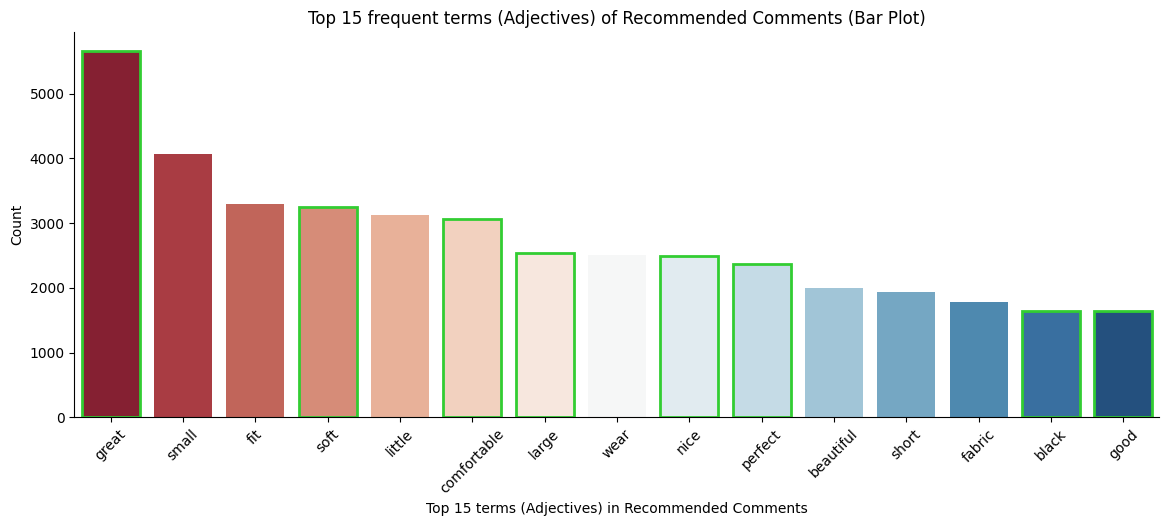

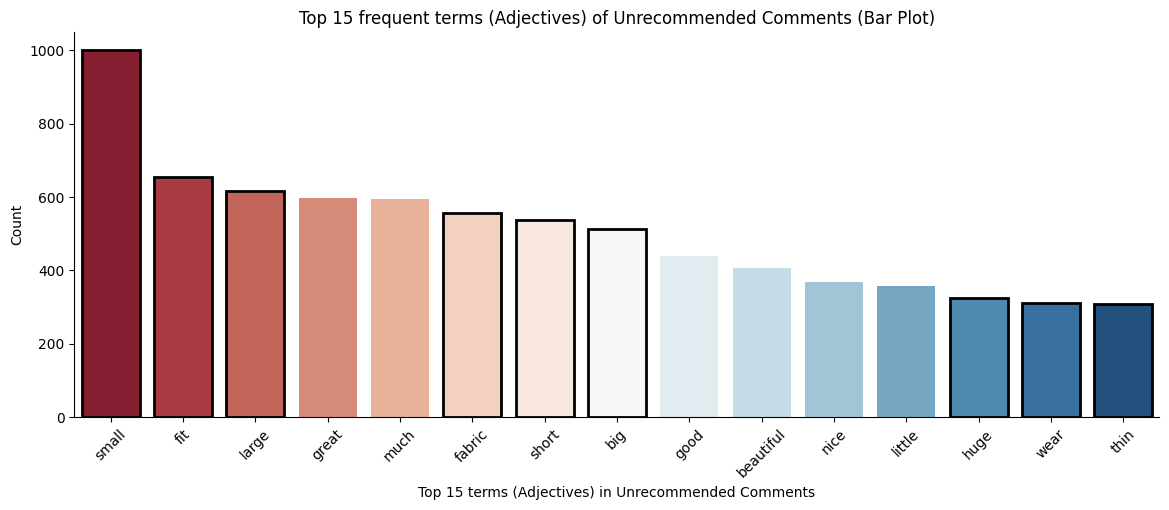

In [ ]:

# Top 15 frequent terms (Adjectives) from comments of recommended products
positive_dict = dict(positive_word_counts.most_common(15))
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(x=list(positive_dict.keys()), y=list(positive_dict.values()), ax=ax, palette="RdBu")
ax.set_title('Top 15 frequent terms (Adjectives) of Recommended Comments (Bar Plot)')
ax.set_xlabel('Top 15 terms (Adjectives) in Recommended Comments')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for index in [0, 3, 5, 6, 8, 9, 13, 14]:
    ax.patches[index].set_linewidth(2)
    ax.patches[index].set_edgecolor('limegreen')


# Top 15 frequent terms from comments of unrecommended products
negative_dict = dict(negative_word_counts.most_common(15))
fig2, ax2 = plt.subplots(figsize=(14, 5))
sns.barplot(x=list(negative_dict.keys()), y=list(negative_dict.values()), ax=ax2, palette="RdBu")
ax2.set_title('Top 15 frequent terms (Adjectives) of Unrecommended Comments (Bar Plot)')
ax2.set_xlabel('Top 15 terms (Adjectives) in Unrecommended Comments')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for index in [0, 1, 2, 5, 6, 7, 12, 13, 14]:
    ax2.patches[index].set_linewidth(2)
    ax2.patches[index].set_edgecolor('black')

plt.show()

Build Word Cloud

Build Word Cloud (for most common words (Adjectives) in Recommended not Unrecommended Reviews separately)

In [ ]:
#Build Word Cloud (for most common words (Adjectives) in Recommended not Unrecommended Reviews separately)
from wordcloud import WordCloud

stop_words = set(stopwords.words('english')) - {'no', 'not', 'nor'}

param_dict_wc = dict(
    max_words = 100,
    colormap='rocket',
    background_color="black",
    width=1600, height=900,
    stopwords=stop_words,
)
# Generate wordcloud
positive = WordCloud(**param_dict_wc).generate(positive_reviews_words)
negative = WordCloud(**param_dict_wc).generate(negative_reviews_words)
print(positive.words_)

{'great': 1.0, 'comfortable': 0.5933228769885727, 'soft': 0.5039211292852341, 'nice': 0.49540667712301145, 'perfect': 0.48846067667488235, 'beautiful': 0.4786018373291508, 'wear': 0.440958996190903, 'little': 0.3844947344835313, 'small': 0.3844947344835313, 'good': 0.3775487340354022, 'large': 0.36791395922025544, 'fit': 0.36522518485323774, 'short': 0.32310105310329373, 'much': 0.30696840690118754, 'true': 0.30652027784001795, 'cute': 0.30360743894241543, 'black': 0.27179027559937263, 'big': 0.26910150123235493, 'fabric': 0.2686533721711853, 'gorgeous': 0.2601389200089626, 'dress': 0.23392336993054, 'petite': 0.21958323997311224, 'casual': 0.21084472328030474, 'white': 0.2072596907909478, 'right': 0.20569123907685413, 'pant': 0.1909029800582568, 'im': 0.18530136679363657, 'many': 0.18328478601837328, 'high': 0.17745910822316827, 'jean': 0.16916872059153035, 'different': 0.1678243334080215, 'happy': 0.15326013892000898, 'regular': 0.1516916872059153, 'usual': 0.14833071924714317, 'loos

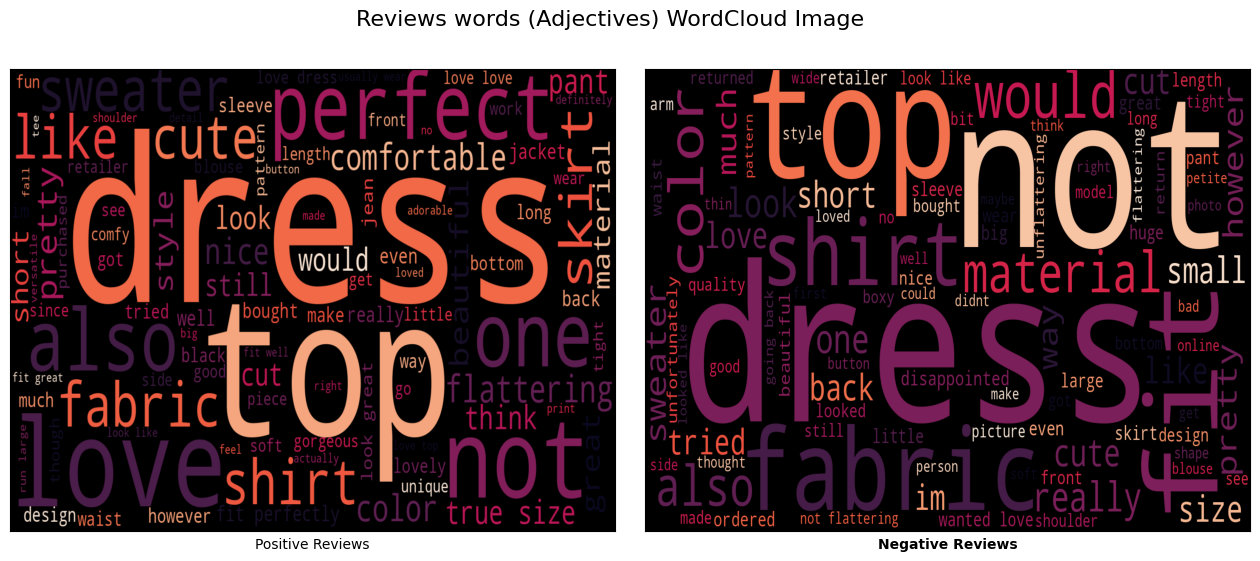

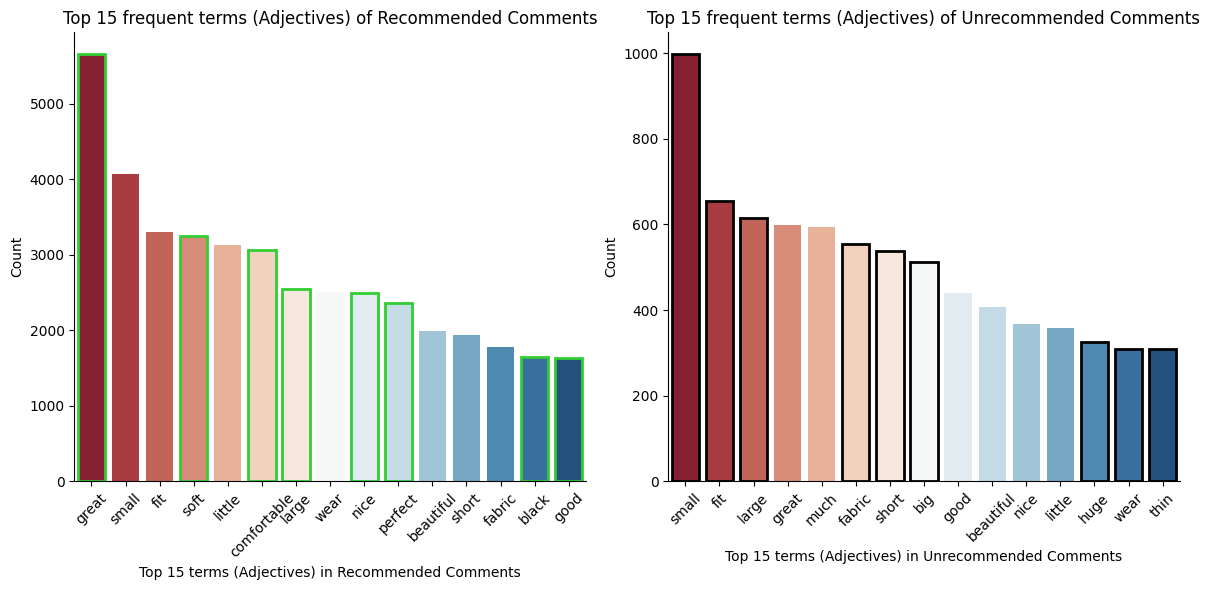

In [ ]:
!pip install -Uq matplotlib-dashboard
from matplotlib_dashboard import MatplotlibDashboard

#create figure to be used as dashboard
fig = plt.figure(figsize = (16, 6))
fig.suptitle('Reviews words (Adjectives) WordCloud Image', fontsize=16)

dashboard = MatplotlibDashboard([
    ['left', 'right'],
    ['left', 'right'],
], wspace=0.05, hspace=0.05, figure = fig)

# drawing plots ...
dashboard['left'].imshow(positive, interpolation="bilinear", aspect='auto');
dashboard['left'].tick_params(left=False, right=False ,
                              labelleft=False, labelbottom=False, bottom=False)
dashboard['left'].set_xlabel(f'Positive Reviews')

dashboard['right'].imshow(negative, interpolation="kaiser", aspect='auto');
dashboard['right'].tick_params(left=False, right=False ,
                               labelleft=False, labelbottom=False, bottom=False)
dashboard['right'].set_xlabel(f'Negative Reviews', fontweight ='bold')

plt.show()
fig.savefig("wordcloud_reviews.png", dpi=300)

#import matplotlib.gridspec as gs
# Top 15 frequent terms (Adjectives) from comments of recommended products
positive_dict = dict(positive_word_counts.most_common(15))
fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(1, 2)

ax1 = plt.subplot(gs[0])
sns.barplot(x=list(positive_dict.keys()), y=list(positive_dict.values()), ax=ax1, palette="RdBu")
ax1.set_title('Top 15 frequent terms (Adjectives) of Recommended Comments')
ax1.set_xlabel('Top 15 terms (Adjectives) in Recommended Comments')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for index in [0, 3, 5, 6, 8, 9, 13, 14]:
    ax1.patches[index].set_linewidth(2)
    ax1.patches[index].set_edgecolor('limegreen')

# Top 15 frequent terms from comments of unrecommended products
negative_dict = dict(negative_word_counts.most_common(15))
ax2 = plt.subplot(gs[1])
sns.barplot(x=list(negative_dict.keys()), y=list(negative_dict.values()), ax=ax2, palette="RdBu")
ax2.set_title('Top 15 frequent terms (Adjectives) of Unrecommended Comments')
ax2.set_xlabel('Top 15 terms (Adjectives) in Unrecommended Comments')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for index in [0, 1, 2, 5, 6, 7, 12, 13, 14]:
    ax2.patches[index].set_linewidth(2)
    ax2.patches[index].set_edgecolor('black')

plt.tight_layout()
plt.show()

fig.savefig("reviews_wordcloud_dashboard.png", dpi=300)


In [ ]:
#Build Word Cloud with Image Background
from PIL import Image

# Set Image
url = "https://img.freepik.com/premium-vector/boutique-visit-semi-flat-rgb-color-vector-illustration-husband-helps-wife-with-choosing-dress-isolated-cartoon-characters-white-background_106317-17521.jpg"

# download Image or use link below
!wget -qO dress.jpg $url

# np.array(Image.open(requests.get(url, stream=True).raw))
# np.array(Image.open("dress.jpg"))

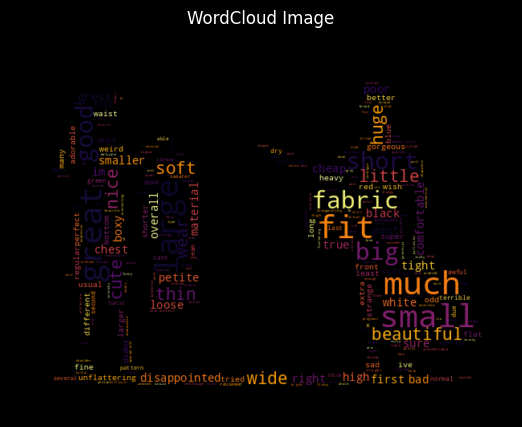

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

mask = np.array(Image.open("dress.jpg"))

# Generate wordcloud. relative_scaling=0 means the frequencies in the data are reflected less
wordcloud = WordCloud(
    background_color="black", colormap=plt.cm.inferno_r,
    max_words =2000, stopwords=stop_words,
    width=1600, height=900, collocations=False, mask=mask,
    relative_scaling=0, contour_width=1).generate(negative_reviews_words)

plt.figure(figsize=(8, 5), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud Image", color='w')
plt.gca().grid(False)
plt.axis("off");


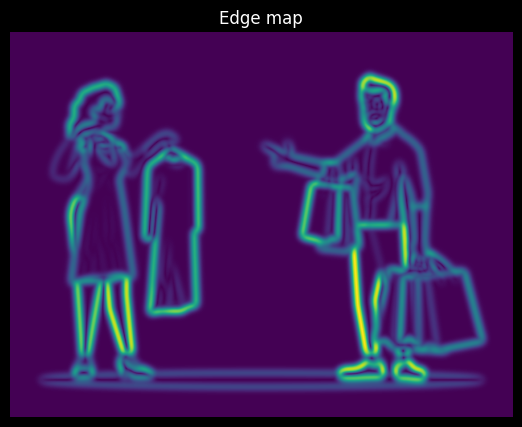

In [ ]:
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude

mask = np.array(Image.open("dress.jpg"))
edges = np.mean([gaussian_gradient_magnitude(mask[:, :, i] / 255., sigma=4) for i in range(3)], axis=0)
mask[edges > edges.max()/1.5] = 0

plt.figure(figsize=(8, 5), facecolor='k')
plt.imshow(edges)
plt.title("Edge map", color='w')
plt.gca().grid(False)
plt.axis("off");

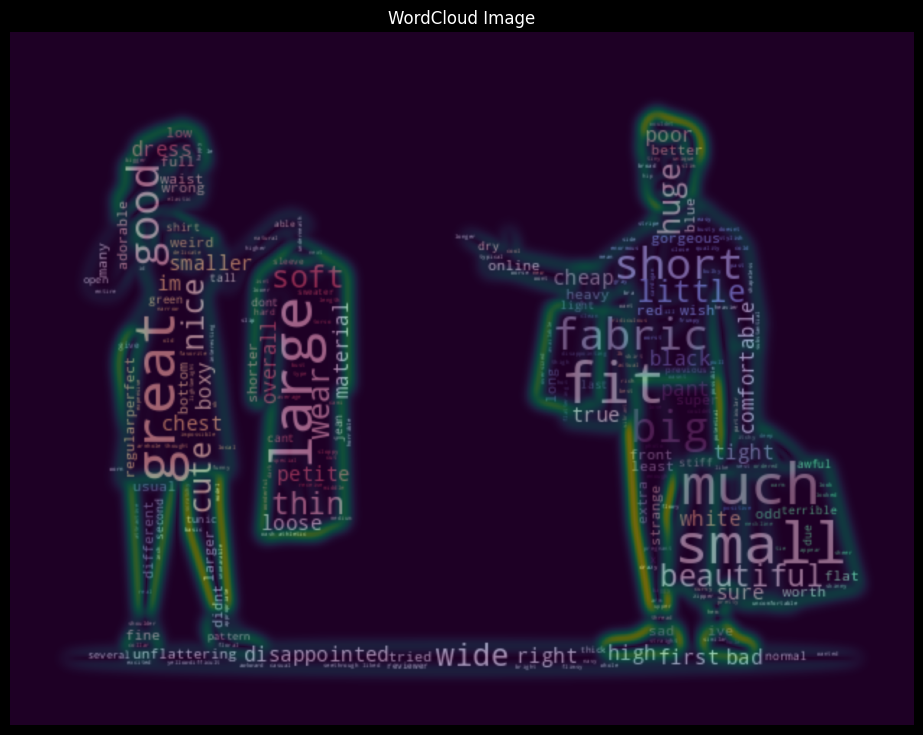

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

# create coloring from image, white is "masked out".
mask[mask.sum(axis=2) == 0] = 255
color = ImageColorGenerator(mask)
wordcloud.recolor(color_func=color)
wordcloud.to_file("new.png")

fig = plt.figure(figsize=(16, 9), facecolor='k')
plt.imshow(wordcloud, interpolation="gaussian")
plt.imshow(edges, alpha=0.45)
plt.title("WordCloud Image", color='w')
plt.gca().grid(False)
plt.axis("off");

fig.savefig("negative_reviews_wordcloud_image.png", dpi=300)

# Deep Learning Classification






Tensorflow LSTM-GRU Model Sentiment
Classification

Preprocess dataframe for classification.  parts here:
1. Tokenization
2. Sequencing
3. Padding
4. Train - Test Split: split by ratio of 0.1
5. Define & Train LSTM-GRU Model
6. Model evaluation

In [ ]:
# !pip install tensorflow -Uq
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix # plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

# !pip install scikeras[tensorflow] -Uq
# from scikeras.wrappers import KerasClassifier, KerasRegressor
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

# Tokenization

In [ ]:
df.head()

,text,recommended,not_recommended,text_clean,text_only_adj
0,Absolutely wonderful - silky and sexy and comf...,1,0,Absolutely wonderful silky sexy comfortable,wonderful silky comfortable
1,Love this dress! it's sooo pretty. i happene...,1,0,Love dress sooo pretty happened find store im ...,find online little true petite
2,Some major design flaws I had such high hopes ...,0,1,Some major design flaw I high hope dress reall...,major petite small usual small small reordered...
3,"My favorite buy! I love, love, love this jumps...",1,0,My favorite buy I love love love jumpsuit fun ...,favorite fabulous wear great
4,Flattering shirt This shirt is very flattering...,1,0,Flattering shirt This shirt flattering due adj...,due adjustable perfect cardigan


In [ ]:
X = df["text_clean"].values
y = df["not_recommended"].values

X.shape, y.shape

((23486,), (23486,))

In [ ]:
# select max tokens number
# num_words = 15000

# create tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=None)  #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)
print(VOCAB_SIZE)

18790


# sequencing-converting words to Numeric tokens

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)  # convert sequence all data
X[0], X_num_tokens[0]
# based on the tokenizer's internal vocabulary. Each text is transformed into a list of integer values representing the tokens.

('Absolutely wonderful silky sexy comfortable', [180, 398, 802, 484, 28])

Number of tokens for each documents for padding

In [ ]:
!pip install tqdm
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
doc_token_length = np.array([len(seq) for seq in tqdm(X_num_tokens)])
print('Max sentence length: ', max(doc_token_length))

# the code calculates the maximum sentence length among the tokenized documents and provides this information as the output.
#It can be useful for understanding the distribution of sentence lengths or determining appropriate input sizes for models that require fixed-length input sequences.

100%|██████████| 23486/23486 [00:00<00:00, 1298627.96it/s]

Max sentence length:  68


In [ ]:
# Detailed Check Each Document Word Count
arr = np.array(doc_token_length)

print("Descriptive analysis")
print("Document Size \t=", arr.shape[0])
print("Doc Token Count\t=", arr)

# measures of central tendency
import numpy as np
from scipy.stats import mode
print("Measures of Central Tendency")
print("Mean \t\t=", arr.mean())
print("Median \t\t=", np.median(arr))
print("Mode \t\t=", mode(arr, keepdims=True)[0][0]) # , keepdims=True
#print("Mode \t\t=", stats.mode(arr, keepdims=True)[0][0]) # , keepdims=True
# measures of dispersion
print("Measures of Dispersion")
print("Minimum \t=", arr.min())
print("Maximum \t=", arr.max())
print("Range \t\t=", arr.ptp())
print("Variance \t=", arr.var())
print("Standard Deviation =", arr.std())

Descriptive analysis
Document Size 	= 23486
Doc Token Count	= [ 5 31 54 ... 22 46 16]
Measures of Central Tendency
Mean 		= 33.00183087796985
Median 		= 32.0
Mode 		= 49
Measures of Dispersion
Minimum 	= 2
Maximum 	= 68
Range 		= 66
Variance 	= 208.53082352347135
Standard Deviation = 14.440596370076666


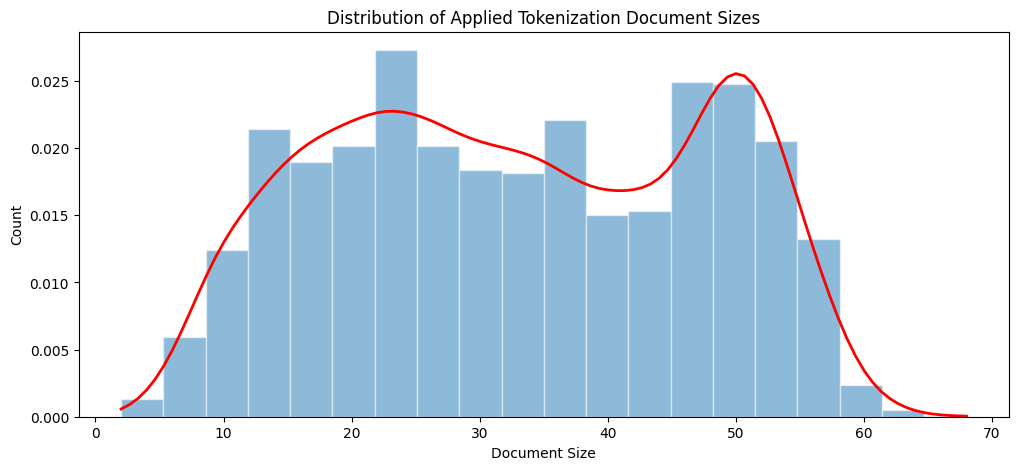

In [ ]:
from scipy.stats import gaussian_kde

# Create the histogram
plt.figure(figsize=(12, 5))
plt.hist(doc_token_length, bins=20, density=True, edgecolor='w', alpha=0.5)
# sns.histplot(doc_token_length, stat='count', discrete=True, kde=True)
# sns.displot(data=doc_token_length, kde=True, rug=True)
plt.title("Distribution of Applied Tokenization Document Sizes")
plt.xlabel("Document Size")
plt.ylabel("Count")
# Estimate the kernel density
kde = gaussian_kde(doc_token_length)
x_grid = np.linspace(min(doc_token_length), max(doc_token_length), 100)
plt.plot(x_grid, kde(x_grid), color='red', linewidth=2)

plt.show()

Define maximum number of tokens from largest documents for padding

In [ ]:
max_doc_token_length = None

if max_doc_token_length is None:
    max_doc_token_length = np.max([len(seq) for seq in tqdm(X_num_tokens)])

print(max_doc_token_length)

round(sum(np.array(doc_token_length) < max_doc_token_length) / len(doc_token_length), ndigits=2)

100%|██████████| 23486/23486 [00:00<00:00, 1303215.11it/s]

68


1.0

# Padding - fixing token counts of each documents

  Padding is necessary when using batch processing or when inputting data into models that require fixed-length input sequences, such as recurrent neural networks (RNNs) or convolutional neural networks (CNNs). By padding sequences to a uniform length, the data can be efficiently processed in parallel, and the model can process multiple sequences simultaneously.

In [ ]:
X_pad = tf.keras.preprocessing.sequence.pad_sequences(X_num_tokens, maxlen=max_doc_token_length)
X_pad.shape
#X_num_tokens = tokens that were coverted to number # 23486 rows


(23486, 68)

# Train- test split

In [ ]:
print(X_pad.shape)
print(y.shape)

(23486, 68)
(23486,)


In [ ]:
from sklearn.model_selection import train_test_split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=random_state)
X_train.shape, X_test.shape

#y = df["not_recommended"].values

((21137, 68), (2349, 68))

# Define & train LSTM-GRU model

Here, we'll use bidirectional LSTM, and use dropout & regularizers to avoid overfitting.

A Bidirectional Long Short-Term Memory (BiLSTM) is a type of recurrent neural network (RNN) architecture that combines the forward and backward information flow through time. It is an extension of the traditional LSTM network, which is a powerful model for sequential data processing.

In [ ]:
#Here, we'll use bidirectional LSTM, and use dropout & regularizers to avoid overfitting.
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    recall = true_positives / (possible_positives + K.epsilon())
    return K.mean(recall)

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + K.epsilon())
    return K.mean(precision)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1 = 2 * ((p * r) / (p + r + K.epsilon()))
    return f1

In [ ]:
model_name = 'LSTM-GRU-Model'
print(f'Model Name:\t{model_name}')


def build_classifier_model(
    model_name: str     = model_name,
    vocab_size: int     = VOCAB_SIZE,
    embedding_dim:int   = 100,  # EMBEDDINGS_DIM - bert 768
    seq_length: int     = max_doc_token_length,
#     embeddings_matrix   = EMBEDDINGS_MATRIX,  # trained embedding
) -> tf.keras.models.Model:
    import tensorflow as tf
    # Define model architecture
    input_ids      = tf.keras.layers.Input(shape=(seq_length,), name='input_ids', dtype='int32')

    embedding_layer = tf.keras.layers.Embedding(input_dim   = vocab_size+1,                      # number of unique words in the corpus
                                               output_dim   = embedding_dim,                     # word embedding size of the dense vector representing each word - bert 768
                                               input_length = seq_length,                        # length of each input sequence
#                                                weights = [embeddings_matrix], trainable=False  # pretrained word embedding
                                               )(input_ids)

    x = tf.keras.layers.Dropout(0.3)(embedding_layer)
    # Bidirectional LSTM-GRU - increase Word Embedding size from 100 to 64*2 - Output shape change return_sequences=True
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, # kernel_regularizer=tf.keras.regularizers.l2(0.0005),
                                                           dropout=0.3, recurrent_dropout=0.3))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.GRU(64, return_sequences=False, dropout=0.3)(x)


     # Prediction
    x = tf.keras.layers.Dense(64, activation='selu', kernel_regularizer=tf.keras.regularizers.l1())(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(32, activation='softsign')(x)              # tf.keras.layers.LeakyReLU(alpha=0.3)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(16, activation=tf.keras.layers.PReLU())(x) # 'elu', 'gelu',
    x = tf.keras.layers.Dropout(0.2)(x)

    # Prediction Dense
    y = tf.keras.layers.Dense(units=1, activation='sigmoid', name='outputs')(x)

    model = tf.keras.Model(inputs = input_ids, outputs = y, name=f'{model_name}')

    # define the metrics
    METRICS = [
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score,
#         tf.keras.metrics.F1Score(threshold=0.50),     # tf-nightly
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(curve='ROC', name='auc'),  # Balanced optimizing the overall accuracy
        tf.keras.metrics.AUC(curve='PR',  name='prc'),  # Imbalanced optimizing the precision-recall
#         tf.keras.metrics.TruePositives(name='tp'),
#         tf.keras.metrics.FalsePositives(name='fp'),
#         tf.keras.metrics.TrueNegatives(name='tn'),
#         tf.keras.metrics.FalseNegatives(name='fn'),
    ]

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss      = tf.keras.losses.BinaryCrossentropy(),
                  metrics   = METRICS,
                  # weighted_metrics = [tf.keras.metrics.Recall()]
    )
    return model

Model Name:	LSTM-GRU-Model


In [ ]:
tf.keras.backend.clear_session()
# Define the strategy
strategy = tf.distribute.OneDeviceStrategy("GPU:0")
with strategy.scope():
    model = build_classifier_model()
    model.summary()

Model: "LSTM-GRU-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 68)]              0         
                                                                 
 embedding (Embedding)       (None, 68, 100)           1879100   
                                                                 
 dropout (Dropout)           (None, 68, 100)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 68, 128)          84480     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 68, 128)          512       
 ormalization)                                                   
                                                                 
 gru (GRU)                   (None, 64)             

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_recall', mode="max",
                           verbose = 1, patience = 2, restore_best_weights=True)

#EarlyStopping is a callback function used during model training to automatically stop the training process under certain conditions.
#It helps prevent overfitting and allows you to find the optimal number of training epochs by monitoring a specified metric.

In [ ]:
%%time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), #validation_split = 0.2,
                    batch_size = 64, epochs = 30, callbacks=[early_stop], verbose = 1)


#%%time to measure the execution time of a cell.
#By using EarlyStopping, you can prevent overfitting, save computational resources by stopping training early when no improvement is observed, and obtain the best performing model based on the chosen metric.

Epoch 1/30
331/331 [==============================] - 167s 469ms/step - loss: 4.3669 - precision: 0.1820 - recall: 0.0655 - f1_score: 0.0462 - accuracy: 0.7817 - auc: 0.5115 - prc: 0.1819 - val_loss: 3.7666 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_accuracy: 0.8225 - val_auc: 0.7549 - val_prc: 0.4253
Epoch 2/30
331/331 [==============================] - 173s 522ms/step - loss: 3.1322 - precision: 0.6579 - recall: 0.2597 - f1_score: 0.3120 - accuracy: 0.8445 - auc: 0.7692 - prc: 0.4719 - val_loss: 2.5554 - val_precision: 0.7941 - val_recall: 0.3885 - val_f1_score: 0.5129 - val_accuracy: 0.8736 - val_auc: 0.9100 - val_prc: 0.7034
Epoch 3/30
331/331 [==============================] - 152s 458ms/step - loss: 2.1068 - precision: 0.6977 - recall: 0.6447 - f1_score: 0.6585 - accuracy: 0.8873 - auc: 0.8902 - prc: 0.6841 - val_loss: 1.6685 - val_precision: 0.6810 - val_recall: 0.6859 - val_f1_score: 0.6757 - val_accuracy: 0.8872 - val_auc: 0.9238 - va

In [ ]:
model.save('sentiment_analysis_lstm_gru_model.h5')
model.save_weights('sentiment_analysis_lstm_gru_model_weights.h5')

# Model evaluation

1. compare model metrics
2. compare Each score

In [ ]:
summary_lstm = pd.DataFrame(model.history.history)
summary_lstm.tail()

,loss,precision,recall,f1_score,accuracy,auc,prc,val_loss,val_precision,val_recall,val_f1_score,val_accuracy,val_auc,val_prc
1,3.132158,0.657895,0.259654,0.311972,0.844491,0.769237,0.471933,2.555381,0.794118,0.388489,0.512946,0.873563,0.910033,0.703415
2,2.106764,0.697695,0.644740,0.658461,0.887259,0.890157,0.684066,1.668510,0.680952,0.685851,0.675724,0.887186,0.923834,0.730719
3,1.333882,0.745668,0.710519,0.719688,0.905521,0.918283,0.749451,1.022950,0.672032,0.800959,0.724620,0.895275,0.929076,0.756374
4,0.772891,0.755878,0.761917,0.749344,0.913990,0.932605,0.780851,0.609431,0.787162,0.558753,0.646881,0.894849,0.925890,0.746893
5,0.420831,0.776330,0.793076,0.776196,0.922647,0.942545,0.806315,0.351575,0.753425,0.659472,0.695070,0.901235,0.930619,0.747728


In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print('TEST')
y_test_pred = (model.predict(X_test, verbose=0) >= 0.5).astype("int32")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = (model.predict(X_train, verbose=0) >= 0.5).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
[[1769  163]
 [  83  334]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.93      1932
           1       0.67      0.80      0.73       417

    accuracy                           0.90      2349
   macro avg       0.81      0.86      0.83      2349
weighted avg       0.90      0.90      0.90      2349

-------------------------------------------------------
TRAIN
[[16254  1128]
 [  470  3285]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     17382
           1       0.74      0.87      0.80      3755

    accuracy                           0.92     21137
   macro avg       0.86      0.90      0.88     21137
weighted avg       0.93      0.92      0.93     21137



In [ ]:
# BEST THRESHOLD calculate precision-recall curve
y_test_proba = model.predict(X_test, verbose=0)
# Create the Precision Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

# calculate F1 score
fscore = np.divide((2 * precision * recall), (precision + recall), out=None, where=(precision*recall)!=0) #only divide nonzeros else None
# locate the index of the largest f score
idx = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[idx], fscore[idx]))

# calculate precision-recall AUC
auc_1 = auc(recall, precision)
print("auc :", auc_1)

Best Threshold=0.525146, F-Score=0.737
auc : 0.754654602216211


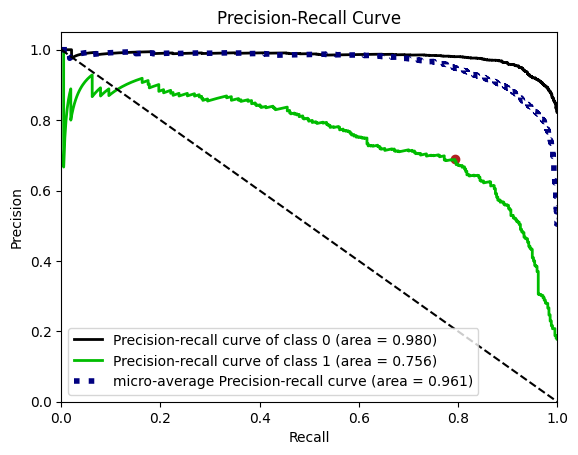

In [ ]:
!pip install scikit-plot -q
import scikitplot as skplt

y_test_proba = model.predict(X_test, verbose=0)
skplt.metrics.plot_precision_recall(y_test, np.hstack([(1-y_test_proba), y_test_proba]));
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.scatter(recall[idx], precision[idx], marker='o', color='firebrick', label='Best')
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

In [ ]:
# use BEST THRESHOLD thresholds[idx]=0.525146
print('TEST')
y_test_pred = (model.predict(X_test, verbose=0) >= thresholds[idx]).astype("int32")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = (model.predict(X_train, verbose=0) >= thresholds[idx]).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
[[1782  150]
 [  86  331]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1932
           1       0.69      0.79      0.74       417

    accuracy                           0.90      2349
   macro avg       0.82      0.86      0.84      2349
weighted avg       0.91      0.90      0.90      2349

-------------------------------------------------------
TRAIN
[[16337  1045]
 [  511  3244]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     17382
           1       0.76      0.86      0.81      3755

    accuracy                           0.93     21137
   macro avg       0.86      0.90      0.88     21137
weighted avg       0.93      0.93      0.93     21137



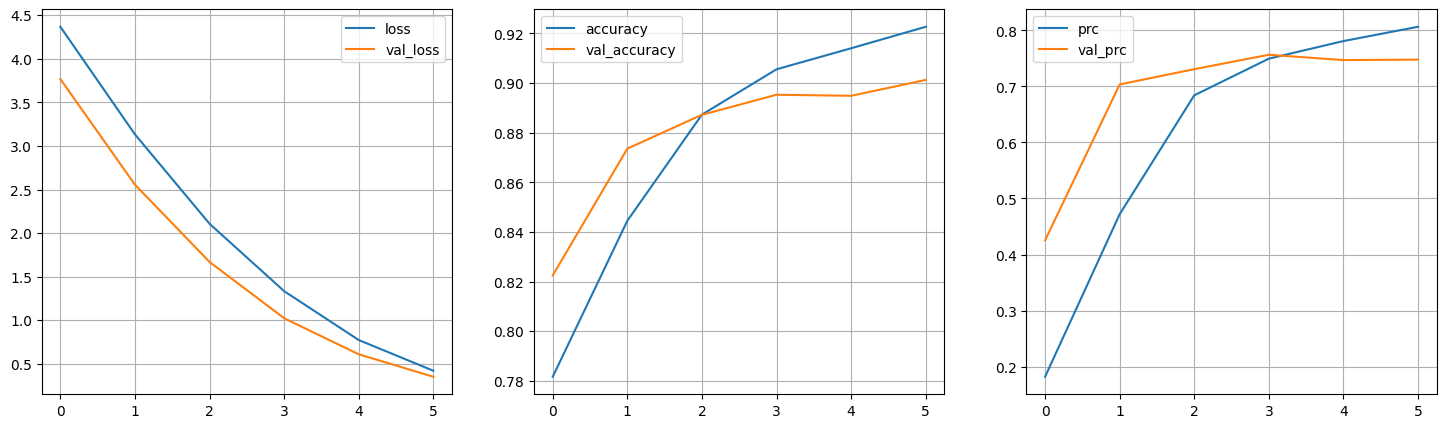

In [ ]:
# Plot training results
H = history.history
fig = plt.figure(figsize = (18, 5))

plt.subplot(131)
plt.plot(H['loss'], label = 'loss')
plt.plot(H['val_loss'], label = 'val_loss')
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(H['accuracy'], label = 'accuracy')
plt.plot(H['val_accuracy'], label = 'val_accuracy')
plt.grid()
plt.legend();

plt.subplot(133)
plt.plot(H['prc'], label = 'prc')
plt.plot(H['val_prc'], label = 'val_prc')
plt.grid()
plt.legend();


In [ ]:
model_lstm_gru = tf.keras.models.load_model('sentiment_analysis_lstm_gru_model.h5', custom_objects={'f1_score': f1_score})
model_lstm_gru